### Import bibliotek

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import ydata_profiling as pp

#sns.set_palette(sns.color_palette("RdPu_r"))

### Import danych

In [2]:
data = pd.read_csv(r"Datasets\adult_census_income.csv")

In [3]:
print(data.shape) # (32561, 15)
data.head()

(32561, 15)


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [4]:
data.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

In [5]:
data.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [6]:
data["income"].value_counts(normalize=True)

income
<=50K    0.75919
>50K     0.24081
Name: proportion, dtype: float64

Tutaj nie powinno być duplikatów, bo wagi rozróżniają

In [7]:
data.drop_duplicates(inplace=True)

In [8]:
data.shape

(32537, 15)

### Szybki przegląd danych

In [9]:
pp.ProfileReport(data, correlations={"cramers": {"calculate": True}})

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 15/15 [00:00<00:00, 35.60it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

`?` oznaczenie dla braków danych, braki występują w kolumnach "workclass", "occupation", "native.country". braki w "workclass" pociągają za sobą braki w "occupation"
___
### Wzorek na p-stwo warunkowe i `groupby + value_counts + normalize`

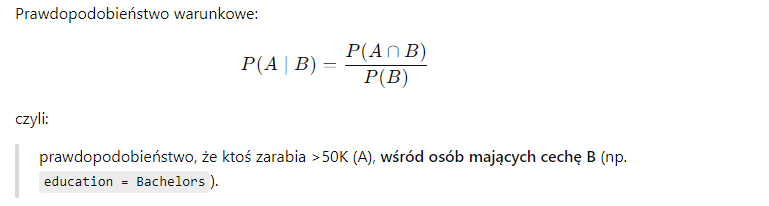

Poniżej obliczenia z `groupby`

In [10]:
data.groupby("sex")["income"].value_counts()

sex     income
Female  <=50K      9583
        >50K       1179
Male    <=50K     15115
        >50K       6660
Name: count, dtype: int64

In [11]:
data.groupby("sex")["income"].value_counts(normalize=True)

sex     income
Female  <=50K     0.890448
        >50K      0.109552
Male    <=50K     0.694145
        >50K      0.305855
Name: proportion, dtype: float64

In [12]:
data.groupby("sex")["income"].value_counts(normalize=True).loc[("Female", ">50K")]

0.1095521278572756

Teraz obliczenia ze wzorku na p-stwo warunkowe, bo nie widzę tego XD

In [13]:
# to teraz z definicji prawdpopodobieństwa warunkowego
# chcemy policzyć p-stwo tego, że zarabia powyżej 50K pod warunkiem, że to kobieta
# A - zarabia powyżej 50K
# B - jest kobietą 

# ile jest wszystkich osób w zbiorze
moc_omegi = len(data)
print(f"Liczba wszystkich osób w zbiorze: {moc_omegi}")

# ile jest osób zarabiających >50K
moc_A = len(data[data["income"]==">50K"])
print(f"Liczba osób zarabiających >50K ogółem: {moc_A}")

# ile jest kobiet w zbiorze
moc_B = len(data[data["sex"]=="Female"])
print(f"Liczba kobiet ogółem: {moc_B}")

Liczba wszystkich osób w zbiorze: 32537
Liczba osób zarabiających >50K ogółem: 7839
Liczba kobiet ogółem: 10762


In [14]:
# P(A) 
P_A = moc_A / moc_omegi
print(f"P-stwo, że zarabia >50K wynosi: {P_A}")

# P(B)
P_B = moc_B / moc_omegi
print(f"P-stwo, że jest kobietą wynosi: {P_B}")

P-stwo, że zarabia >50K wynosi: 0.2409257153394597
P-stwo, że jest kobietą wynosi: 0.33076190183483417


In [15]:
# ile jest osób zarabiających >50K, które są kobietami?
moc_A_i_B = len(data[(data["sex"]=="Female") & (data["income"]==">50K")])
print(f"Liczba kobiet zarabiających >50K: {moc_A_i_B}")

# P(A i B) - p-stwo, że zarabia >50K i jest kobietą
P_A_i_B = moc_A_i_B / moc_omegi
print(f"P-stwo, że zarabia >50K i jest kobietą wynosi: {P_A_i_B}")

Liczba kobiet zarabiających >50K: 1179
P-stwo, że zarabia >50K i jest kobietą wynosi: 0.0362356701601254


In [16]:
# P(A|B) - p-stwo, że zarabia >50K pod warunkiem, że jest kobietą
P_A_pod_war_B = moc_A_i_B / moc_B
print(f"P-stwo, że zarabia >50K, pod warunkiem, że jest kobietą wynosi: {P_A_pod_war_B}")

P-stwo, że zarabia >50K, pod warunkiem, że jest kobietą wynosi: 0.1095521278572756


In [17]:
data.groupby("sex")["income"].value_counts(normalize=True).loc[("Female", ">50K")] == P_A_pod_war_B

True

Rzeczywiście ten sam wynik obliczony ze wzoru na około i za pomocą `groupby + value_counts + normalize` :))
___

Co ze zmiennymi `capital.gain` i `capital.loss`? Mają dużo zer i nie mają `nan`s

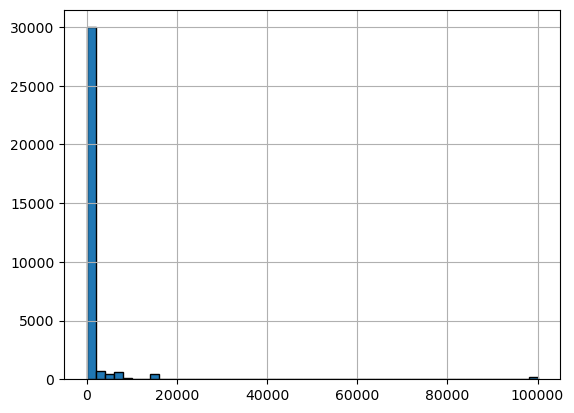

In [18]:
data["capital.gain"].hist(bins=50, edgecolor="black")
plt.show()

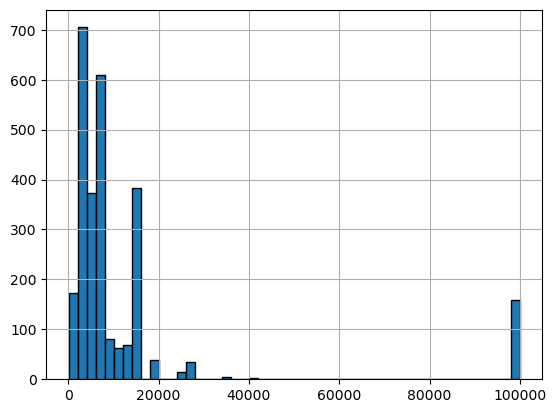

In [19]:
data[data["capital.gain"]>0]["capital.gain"].hist(bins=50, edgecolor="black")
plt.show()

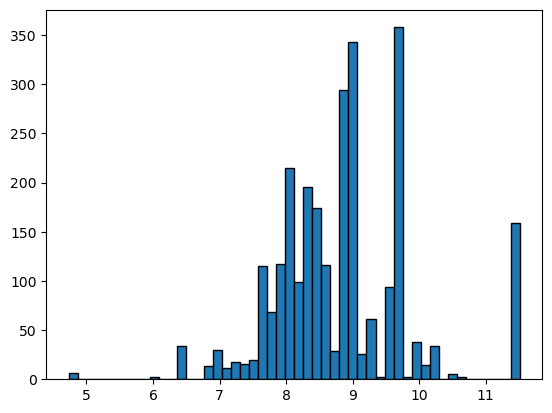

In [20]:
plt.hist(np.log(data[data["capital.gain"]>0]["capital.gain"]), bins=50, edgecolor="black")
plt.show()

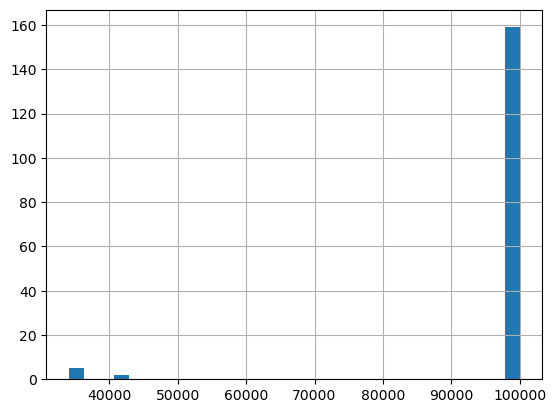

In [21]:
data[data["capital.gain"]>30000]["capital.gain"].hist(bins=30)
plt.show()

Chat mówi, że te wartości 99999 to nie uzupełnione arbitrary value braki

In [22]:
data[data["capital.gain"]>30000]["capital.gain"].value_counts()

capital.gain
99999    159
34095      5
41310      2
Name: count, dtype: int64

A jak w `capital.loss`?

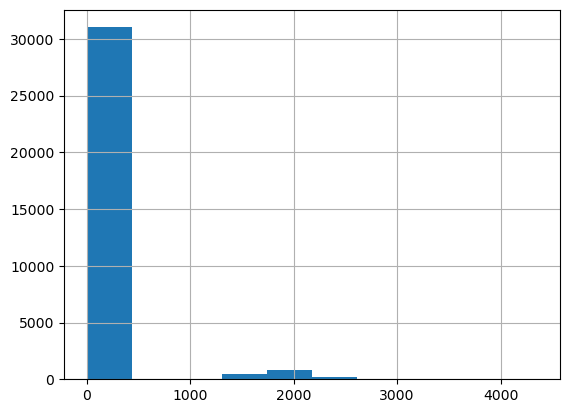

In [23]:
data["capital.loss"].hist()
plt.show()

Tylko dodatnie wartości

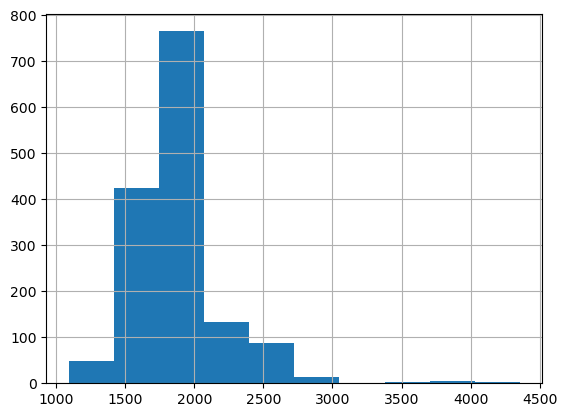

In [24]:
data[data["capital.loss"]>1000]["capital.loss"].hist()
plt.show()

In [25]:
data[data["capital.loss"]>3000]["capital.loss"].value_counts()

capital.loss
4356    3
3900    2
3770    2
3683    2
3004    2
Name: count, dtype: int64

Zrobimy capital.balance

In [26]:
((data["capital.gain"] > 0) & (data["capital.loss"] > 0)).sum()

0

In [27]:
data[["capital.gain", "capital.loss"]]

,capital.gain,capital.loss
0,0,4356
1,0,4356
2,0,4356
3,0,3900
4,0,3900
...,...,...
32556,0,0
32557,0,0
32558,0,0
32559,0,0


In [28]:
data["capital.balance"] = data["capital.gain"] - data["capital.loss"]

In [29]:
data[data["capital.balance"]<0].shape

(1519, 16)

___
### Czym charakteryzuje się grupa zarabiająca `>50K`?

In [30]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income', 'capital.balance'],
      dtype='object')

#### `sex`

In [31]:
data.groupby("sex")["income"].value_counts(normalize=True).round(2).unstack()

income,<=50K,>50K
sex,,
Female,0.89,0.11
Male,0.69,0.31


In [32]:
# top samo co wyżej, tylko inaczej do tego doszliśmy
pd.crosstab(data["sex"], data["income"], normalize="index").round(2)

income,<=50K,>50K
sex,,
Female,0.89,0.11
Male,0.69,0.31


Jeśli znamy płeć, to p-stwo, że:
- kobieta zarabia `>50K` wynosi $0.11$;
- mężczyzna zarabie `>50K` wynosi $0.31$

`pd.crosstab` może działać po wierszach i po kolumnach

In [33]:
# teraz rozważamy grupy ze względu na dochód (wyżej ze względu na płeć)
pd.crosstab(data["sex"], data["income"], normalize="columns").round(2)

income,<=50K,>50K
sex,,
Female,0.39,0.15
Male,0.61,0.85


#### `workclass`

In [34]:
data.groupby("workclass")["income"].value_counts(normalize=True).unstack()

income,<=50K,>50K
workclass,,
?,0.895969,0.104031
Federal-gov,0.613542,0.386458
Local-gov,0.705208,0.294792
Never-worked,1.000000,NaN
Private,0.781193,0.218807
Self-emp-inc,0.442652,0.557348
Self-emp-not-inc,0.714961,0.285039
State-gov,0.728043,0.271957
Without-pay,1.000000,NaN


In [35]:
table = data.groupby("income")["workclass"].value_counts(normalize=True).unstack() #.sum(axis=1) -> 1
table

workclass,?,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay
income,,,,,,,,,
<=50K,0.066605,0.023848,0.059762,0.000283,0.717143,0.020002,0.073528,0.038262,0.000567
>50K,0.024365,0.047327,0.078709,NaN,0.632861,0.079347,0.092359,0.045031,NaN


Jeden wykres:

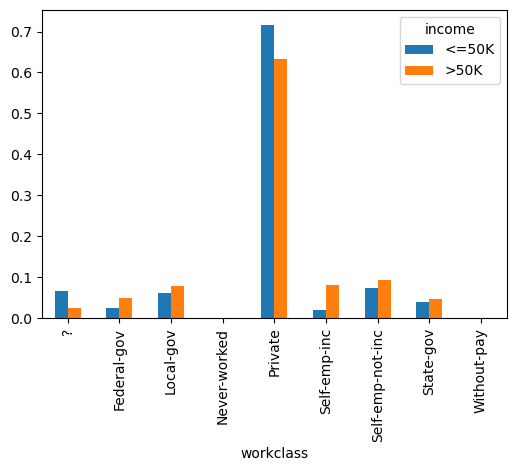

In [36]:
table.T.plot(kind="bar", figsize=(6,4))
plt.show()

Drugi wykres:

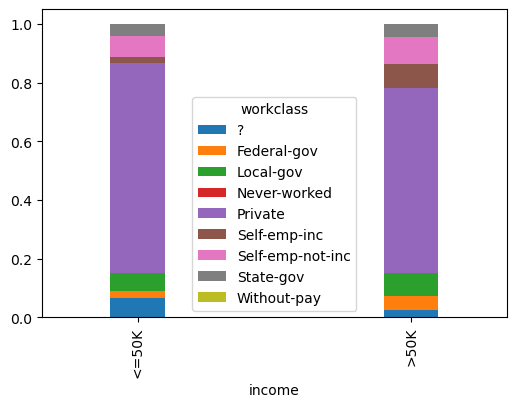

In [37]:
table.plot(kind="bar", figsize=(6,4), stacked=True, width=0.2)

plt.show()

#### `age`

Rozkład wieku dla obu grup dochodu

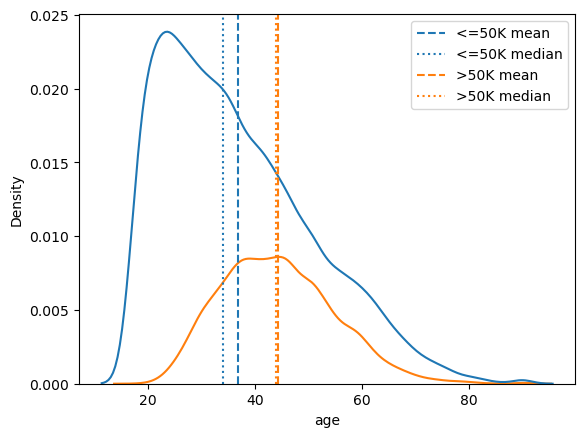

In [38]:
sns.kdeplot(data=data, x="age", hue="income")

# obliczamy statystyki dla każdej grupy income
group_stats = data.groupby("income")["age"].agg(["mean", "median"])

# dodajemy pionowe linie
ax = plt.gca()  # pobiera aktualną oś
colors = ["tab:blue", "tab:orange"]  # domyślna paleta seaborn

for i, (group, stats) in enumerate(group_stats.iterrows()):
    ax.axvline(stats["mean"], color=colors[i], linestyle="--", linewidth=1.5,
               label=f"{group} mean")
    ax.axvline(stats["median"], color=colors[i], linestyle=":", linewidth=1.5,
               label=f"{group} median")

plt.legend()

plt.show()

In [39]:
group_stats

,mean,median
income,,
<=50K,36.787392,34.0
>50K,44.250925,44.0


In [40]:
data.groupby("income")["age"].describe()

,count,mean,std,min,25%,50%,75%,max
income,,,,,,,,
<=50K,24698.0,36.787392,14.017335,17.0,25.0,34.0,46.0,90.0
>50K,7839.0,44.250925,10.520102,19.0,36.0,44.0,51.0,90.0


#### `hours.per.week`

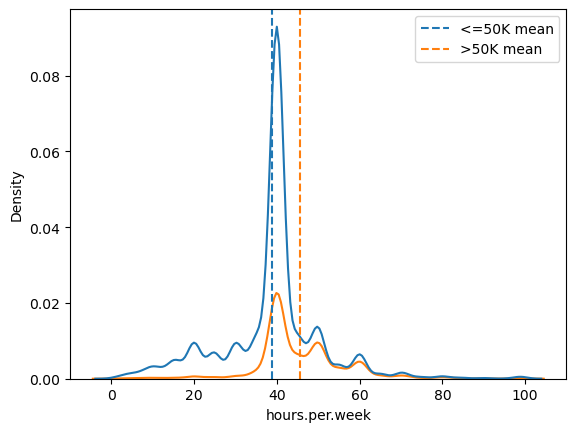

In [41]:
sns.kdeplot(data=data, x="hours.per.week", hue="income")

# obliczamy statystyki dla każdej grupy income
group_stats = data.groupby("income")["hours.per.week"].agg(["mean", "median"])

# dodajemy pionowe linie
ax = plt.gca()  # pobiera aktualną oś
colors = ["tab:blue", "tab:orange"]  # domyślna paleta seaborn

for i, (group, stats) in enumerate(group_stats.iterrows()):
    ax.axvline(stats["mean"], color=colors[i], linestyle="--", linewidth=1.5,
               label=f"{group} mean")

plt.legend()

plt.show()

In [42]:
group_stats

,mean,median
income,,
<=50K,38.842862,40.0
>50K,45.473402,40.0


Tworzymy nową kolumnę, żeby sprawdzić, kto pracuje więcej niż 40 godzin tygodniowo.

In [43]:
data["over.40.hours"] = np.where(data["hours.per.week"]>40, ">40h", "<=40h")

In [44]:
pd.crosstab(data["income"], data["over.40.hours"], normalize="index")

over.40.hours,<=40h,>40h
income,,
<=50K,0.768362,0.231638
>50K,0.508228,0.491772


Wśród osób zarabiających powyżej 50k odsetek osób pracujących powyżej 40h tygodniowo jest ponad dwa razy większy niż wśród osób zarabiających 50k lub mniej.

#### `education`

In [45]:
order = [
    "Preschool",
    "1st-4th",
    "5th-6th",
    "7th-8th",
    "9th",
    "10th",
    "11th",
    "12th",
    "HS-grad",
    "Some-college",
    "Assoc-voc",
    "Assoc-acdm",
    "Bachelors",
    "Masters",
    "Doctorate"
]

data["education"] = pd.Categorical(data["education"], categories=order, ordered=True)


Stworzymy nową zmienną binarną - czy ktoś ma wyższe wykształcenie, czy nie -> "Bachelors", "Masters", "Doctorate"

In [46]:
data["higher.education"] = np.where(data["education"].isin(["Bachelors", "Masters", "Doctorate"]), "yes", "no")

In [47]:
data.groupby("income")["education"].value_counts(normalize=True).unstack()

education,Preschool,1st-4th,5th-6th,7th-8th,9th,10th,11th,12th,HS-grad,Some-college,Assoc-voc,Assoc-acdm,Bachelors,Masters,Doctorate
income,,,,,,,,,,,,,,,
<=50K,0.002037,0.006519,0.012874,0.024649,0.019841,0.035486,0.045427,0.016297,0.359340,0.240212,0.041597,0.032675,0.127602,0.031086,0.004359
>50K,0.000000,0.000809,0.002157,0.005394,0.003641,0.008360,0.008091,0.004450,0.225728,0.186893,0.048679,0.035734,0.299488,0.129315,0.041262


In [48]:
data.groupby("income")["higher.education"].value_counts(normalize=True).unstack()

higher.education,no,yes
income,,
<=50K,0.837963,0.162037
>50K,0.555300,0.444700


#### `marital.status`

In [49]:
pd.crosstab(data["income"], data["marital.status"], normalize="index").round(3)

marital.status,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed
income,,,,,,,
<=50K,0.161,0.001,0.335,0.016,0.412,0.039,0.037
>50K,0.059,0.001,0.853,0.004,0.063,0.008,0.011


#### `occupation`

In [50]:
pd.crosstab(data["income"], data["occupation"], normalize="index").round(3)

occupation,?,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving
income,,,,,,,,,,,,,,,
<=50K,0.067,0.132,0.0,0.128,0.085,0.036,0.052,0.071,0.128,0.006,0.092,0.018,0.108,0.026,0.052
>50K,0.024,0.065,0.0,0.119,0.251,0.015,0.011,0.032,0.017,0.000,0.237,0.027,0.125,0.036,0.041


Widać sporą różnicę w "Adm-clerical", "Exec-managerial", "Prof-specialty"

#### `relationship`

In [51]:
group_stats = pd.crosstab(data["income"], data["relationship"], normalize="index")
group_stats

relationship,Husband,Not-in-family,Other-relative,Own-child,Unmarried,Wife
income,,,,,,
<=50K,0.294396,0.301077,0.038222,0.202324,0.130658,0.033323
>50K,0.754688,0.109198,0.004720,0.008547,0.027810,0.095038


In [52]:
data["sex"].value_counts(normalize=True) # dwa razy więcej mężczyzn -> trzeba by się było przyjrzeć wagom

sex
Male      0.669238
Female    0.330762
Name: proportion, dtype: float64

#### `capital.balance`

In [53]:
data["positive.balance"] = np.where(data["capital.balance"] > 0, "yes", "no")

In [54]:
pd.crosstab(data["income"], data["positive.balance"], normalize="index")

positive.balance,no,yes
income,,
<=50K,0.958094,0.041906
>50K,0.786070,0.213930


#### mężczyzna z wyższym wykształceniem

In [55]:
subset = data[(data["sex"]=="Male") & (data["higher.education"]=="yes")]
subset.shape

(5248, 19)

In [56]:
data.groupby(["income", "higher.education"])["sex"].value_counts(normalize=True).unstack()


sex                        Female      Male
income higher.education                    
<=50K  no                0.382248  0.617752
       yes               0.417791  0.582209
>50K   no                0.140363  0.859637
       yes               0.162937  0.837063